In [4]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading Models
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

In [6]:
# Load Data
crop_data = pd.read_csv("Crop_recommendation.csv")

In [7]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
# this is a categorical dataset and its a classification problem
# general
crop_data.shape

(2200, 8)

In [9]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
# checking null data
crop_data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [11]:
# checking duplicate
crop_data.duplicated().sum()

0

In [12]:
crop_data.describe() # numerical features of our data set , (non categorical)

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
# exploring data
# correlatons between features
corr = crop_data.select_dtypes(include=['number']).corr()

In [14]:
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

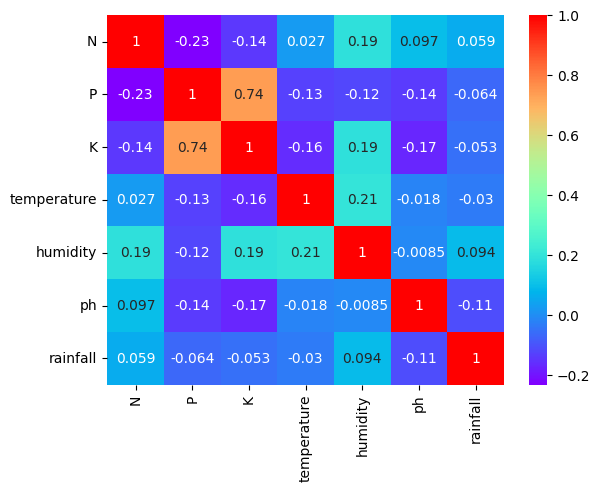

In [15]:
# using seaborn to visualize
sns.heatmap(corr,annot=True,cbar=True,cmap='rainbow')

In [16]:
crop_data['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [17]:
# encoding
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 'papaya': 6,
    'orange': 7, 'apple': 8, 'muskmelon': 9, 'watermelon': 10, 'grapes': 11,
    'mango': 12, 'banana': 13, 'pomegranate': 14, 'lentil': 15, 'blackgram': 16,
    'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19, 'kidneybeans': 20,
    'chickpea': 21, 'coffee': 22
}

In [18]:
crop_data['numerical_crop'] = crop_data['label'].map(crop_dict)

In [19]:
crop_data['numerical_crop'].value_counts()

,count
numerical_crop,
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


In [20]:
crop_data.drop(['label'],axis = 1,inplace = True)
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,numerical_crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [21]:
# giving features to X and target to y
X = crop_data.drop('numerical_crop',axis = 1)
y = crop_data['numerical_crop']

In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape , X_test.shape)

(1760, 7) (440, 7)


In [24]:
print(y_train.shape , y_test.shape)

(1760,) (440,)


In [25]:
# MinMaxScaler  --> is used to scale continuous features to a specific range,basically in the range of [0,1]
MMscaler = MinMaxScaler()
X_train = MMscaler.fit_transform(X_train)
X_test = MMscaler.fit_transform(X_test)

In [26]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [27]:
X_test

array([[0.72142857, 0.08571429, 0.2020202 , ..., 0.94156508, 0.43357429,
        0.02211331],
       [0.7       , 0.02142857, 0.22222222, ..., 0.84553584, 0.4456159 ,
        0.10597679],
       [0.42142857, 0.40714286, 0.21212121, ..., 0.92544291, 0.55619767,
        0.34298924],
       ...,
       [0.86428571, 0.3       , 0.04545455, ..., 0.76097763, 0.68292227,
        0.18964149],
       [0.82857143, 0.33571429, 0.06060606, ..., 0.71506432, 0.42214144,
        0.16999146],
       [0.03571429, 0.45      , 0.06565657, ..., 0.22054288, 0.42329901,
        0.49021626]])

In [28]:
# now we will perform Standardization
scaler_Stdz = StandardScaler()
X_train = scaler_Stdz.fit_transform(X_train)
X_test = scaler_Stdz.fit_transform(X_test)

In [29]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [30]:
X_test

array([[ 1.44233779, -1.13052957, -0.02454475, ...,  1.0157714 ,
        -0.33350426, -1.46473212],
       [ 1.3574717 , -1.4117947 ,  0.05727109, ...,  0.66193645,
        -0.23770082, -1.04330542],
       [ 0.25421252,  0.27579609,  0.01636317, ...,  0.95636671,
         0.64209145,  0.14771821],
       ...,
       [ 2.00811173, -0.19297913, -0.65861755, ...,  0.35036835,
         1.65031663, -0.62287754],
       [ 1.86666825, -0.03672073, -0.59725567, ...,  0.1811935 ,
        -0.42446437, -0.72162197],
       [-1.27337712,  0.46330617, -0.57680171, ..., -1.640949  ,
        -0.41525474,  0.88755633]])

In [31]:
# Model Initialization
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
}

In [32]:
# Model Training and Evaluation
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} with accuracy: {accuracy_score(y_test, y_pred)}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Logistic Regression with accuracy: 0.9545454545454546
[[13  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 20  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0

In [33]:
# Hyperparameter Tuning Example (RandomForest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [34]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [35]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Model Accuracy: {accuracy_score(y_test, best_model.predict(X_test))}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Accuracy: 0.9795454545454545


In [36]:
# making prediction
def recommendation(N, P, k, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, k, temperature, humidity, ph, rainfall]])

    # Transform features using the fitted scalers
    transformed_features = MMscaler.transform(features)
    transformed_features = scaler_Stdz.transform(transformed_features)

    # Predict using the trained model
    prediction = best_model.predict(transformed_features).reshape(1, -1)

    return prediction[0]

In [37]:
# Example Prediction
N, P, K, temperature, humidity, ph, rainfall = 50, 30, 50, 40.0, 20, 10, 30
predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)

In [38]:
crop_dict_reverse = {v: k for k, v in crop_dict.items()}
if predict[0] in crop_dict_reverse:
    crop = crop_dict_reverse[predict[0]]
    print(f"{crop} is the best crop to be cultivated.")
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")

muskmelon is the best crop to be cultivated.


In [39]:
# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
# saving scalers
with open('minmaxscaler.pkl', 'wb') as scaler_file:
    pickle.dump(MMscaler, scaler_file)
with open('standscaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_Stdz, scaler_file)